In [228]:
import numpy as np
from random import randint

In [229]:
# 1

def prod(m1, m2):
    n, m, p = len(m1), len(m1[0]), len(m2[0])
    m3 = [[0 for k in range(p)] for i in range(n)]
    for i in range(n):
        for j in range(p):
            s = 0
            for k in range(m):
                s += m1[i][k] * m2[k][j]
            m3[i][j] = s
    return m3

def det(m):
    s = 0
    a, b = len(m), len(m[0])
    if (a == 2): return m[0][0] * m[1][1] - m[1][0] * m[0][1]
    for i in range(b):
        s += (-1)**(i) * m[0][i] * det([[m[x][y] for y in range(b) if y != i] for x in range(1, a)])
    return s

def inv(m):
    a, b = len(m), len(m[0])
    d = det(m)
    m_inv = [[0 for k in range(b)] for i in range(a)]
    for i in range(a):
        for k in range(b):
            m_inv[i][k] = (-1)**(i + k) * det([[m[x][y] for y in range(b) if y != k] for x in range(a) if x != i])
    return [[m_inv[k][i] / d for k in range(b)] for i in range(a)]


In [230]:
n = 3
A = [[randint(-100, 100) for k in range(n)] for i in range(n)]
f = [[randint(-100, 100)] for i in range(n)]

# inverse
x = prod(inv(A), f)
x1 = np.linalg.solve(A, f)
print(*x, sep='\n')
print()
print(x1)


[1.8511102029696227]
[-0.22776188530173003]
[0.6669391091132]

[[ 1.8511102 ]
 [-0.22776189]
 [ 0.66693911]]


In [231]:
# kramer

def kramer(a, f):
    n, m = len(a), len(a[0])
    x = [0 for i in range(n)]
    d = det(a)
    for i in range(m):
        x[i] = det([[a[x][y] if y != i else f[x][0] for y in range(m)] for x in range(n)]) / d
    return x


In [232]:
n = 3
A = [[randint(-100, 100) for k in range(n)] for i in range(n)]
f = [[randint(-100, 100)] for i in range(n)]


x = kramer(A, f)
x1 = np.linalg.solve(A, f)
print(*x, sep='\n')
print()
print(*x1, sep='\n')


9.57385334223324
-6.718222561266329
-15.67597978449509

[9.57385334]
[-6.71822256]
[-15.67597978]


In [237]:
# 2
import copy

def gauss(a, f):
    a = list(copy.deepcopy(a))
    f = list(copy.deepcopy(f))
    n = len(a)
    for i in range(n - 1):
        for j in range(i, n - 1):
            tmp = a[j + 1][i]
            for k in range(i, n):
                a[j + 1][k] += a[i][k] * (-tmp / a[i][i])
            f[j + 1][0] += f[i][0] * (-tmp / a[i][i])
    
    x = [f[-1][0] / a[-1][-1]] + [.0 for i in range(n - 1)]
    for i in range(1, n):
        numerator = 0
        for j in range(i):
            numerator += x[j] * a[n - 1 - i][n - 1 - j]
        x[i] = (f[n - 1 - i][0] - numerator) / a[n - 1 - i][n - 1 - i]
        
    return x[::-1]

def gauss2(a, f):
    a = list(copy.deepcopy(a))
    f = list(copy.deepcopy(f))
    n, m = len(a), len(a[0])
    perm = list(range(m))
    for i in range(n):
        mx, ind_i, ind_k = 0, 0, 0
        
        for j in range(i, n):
            for k in range(i, m):
                if (j == k == i):
                    mx = a[j][k]
                    ind_i, ind_k = i, i
                if (a[j][k] > mx):
                    mx = a[j][k]
                    ind_i, ind_k = j, k
                    
        for j in range(i, m):
            tmp = a[i][j]
            a[i][j] = a[ind_i][j]
            a[ind_i][j] = tmp

        for j in range(n):
            tmp = a[j][i]
            a[j][i] = a[j][ind_k]
            a[j][ind_k] = tmp
        tmp = f[i][0]
        f[i][0] = f[ind_i][0]
        f[ind_i][0] = tmp
        perm[i], perm[ind_k] = perm[ind_k], perm[i]
        

        for j in range(i, n - 1):
            tmp = a[j + 1][i]
            for k in range(i, n):
                a[j + 1][k] += a[i][k] * (-tmp / a[i][i])
            f[j + 1][0] += f[i][0] * (-tmp / a[i][i]) 


    x = [f[-1][0] / a[-1][-1]] + [.0 for i in range(n - 1)]
    for i in range(1, n):
        numerator = 0
        for j in range(i):
            numerator += x[j] * a[n - 1 - i][n - 1 - j]
        x[i] = (f[n - 1 - i][0] - numerator) / a[n - 1 - i][n - 1 - i]
    x = x[::-1]
    x_corr = [0.0 for _ in range(n)]
    for i in range(n):
        x_corr[perm[i]] = x[i]
    return x_corr


In [239]:
n = 10
A = [[randint(-100, 100) for k in range(n)] for i in range(n)]
f = [[randint(-100, 100)] for i in range(n)]
print(np.linalg.solve(A, f))
print(*gauss(A, f), sep='\n')

[[ 0.12830127]
 [-1.17572965]
 [-0.02127205]
 [-1.80103498]
 [ 0.52852943]
 [-2.9500085 ]
 [ 0.2853167 ]
 [ 0.60111501]
 [ 0.05570309]
 [-1.43555813]]
0.1283012711737506
-1.1757296511735573
-0.02127205179527674
-1.8010349771681555
0.5285294268642688
-2.9500084976844874
0.2853166975964957
0.6011150143985307
0.05570309493081986
-1.4355581267094604


In [123]:
"Precision test"

n = 15
A = [[randint(-100, 100) for k in range(n)] for i in range(n)]
f = [[randint(-100, 100)] for i in range(n)]

G1, G2 = gauss(A, f), gauss2(A, f)
for i in range(n):
    print(np.abs(G2[i] - G1[i]))


1.3766765505351941e-14
2.6645352591003757e-15
8.881784197001252e-15
1.021405182655144e-14
1.3766765505351941e-14
1.2545520178264269e-14
2.1316282072803006e-14
1.0658141036401503e-14
4.440892098500626e-15
7.105427357601002e-15
1.4210854715202004e-14
4.440892098500626e-16
0.0
1.7763568394002505e-15
3.3306690738754696e-16


In [124]:
# 3
from sympy import Matrix

A = Matrix([[2, 1, -1], [-3, -1, 2], [-2, 1, 2]])
f = Matrix([8, -11, -3])
M = A.row_join(f)

M_rref, pivot_columns = M.rref()
print(M_rref)
solution = M_rref[:, -1]
solution = np.array(solution)
solution = solution.flatten()
print("Решение системы уравнений:", solution)

A = np.array([[2, 1, -1], [-3, -1, 2], [-2, 1, 2]])
f = np.array([8, -11, -3])
x, r, ra, s = np.linalg.lstsq(A, f, rcond=None)
print("\n\nРешение системы уравнений:", x)

Matrix([[1, 0, 0, 2], [0, 1, 0, 3], [0, 0, 1, -1]])
Решение системы уравнений: [2 3 -1]


Решение системы уравнений: [ 2.  3. -1.]


In [240]:
# 4 

def new_det(a):
    a = copy.deepcopy(a)
    n = len(a)
    mul = 0
    for i in range(n):
        if (a[i][i] == 0):
            mul += 1
            for k in range(n):
                if (a[k][i] != 0):
                    for t in range(n):
                        tmp = a[i][t]
                        a[i][t] = a[k][t]
                        a[k][t] = tmp
                    break
                return 0
    if (mul == n): return 0

    for i in range(n - 1):
        for j in range(i, n - 1):
            tmp = a[j + 1][i]
            for k in range(i, n):
                a[j + 1][k] += a[i][k] * (-tmp / a[i][i])
    p = 1
    for i in range(n): p *= a[i][i]
    return p * (-1)**mul

def new_inv(m):
    a, b = len(m), len(m[0])
    d = new_det(m)
    m_inv = [[0 for k in range(b)] for i in range(a)]
    for i in range(a):
        for k in range(b):
            m_inv[i][k] = (-1)**(i + k) * new_det([[m[x][y] for y in range(b) if y != k] for x in range(a) if x != i])
    return [[m_inv[k][i] / d for k in range(b)] for i in range(a)]

def new_kramer(a, f):
    n, m = len(a), len(a[0])
    x = [0 for i in range(n)]
    d = new_det(a)
    for i in range(m):
        x[i] = new_det([[a[x][y] if y != i else f[x][0] for y in range(m)] for x in range(n)]) / d
    return x

In [261]:
A = [[randint(1, 100) for k in range(20)] for i in range(20)]
X = [[randint(1, 100)] for i in range(20)]

print("Initial large condition number: ", np.linalg.cond(A))
A[0][0] += 10000
A[-1][-1] = 1
print("New large condition number: ", np.linalg.cond(A))

f = prod(A, X)

x_gauss = gauss(A, f)

x_gauss2 = gauss2(A, f)

d = new_det(A)

if (d != 0): x_kramer = new_kramer(A, f)
x_inv = np.dot(np.linalg.inv(A), f)
A = Matrix(A)
f = Matrix(f)
M = A.row_join(f)
M_rref, pivot_columns = M.rref()
x_rref = M_rref[:, -1]
x_rref = np.array(solution)
x_rref = solution.flatten()

Initial large condition number:  359.4150215927719
New large condition number:  1804.1781661632351
Initial X: [[6], [13], [75], [24], [96], [79], [53], [6], [98], [40], [86], [38], [23], [22], [14], [87], [93], [98], [47], [97]]
Gauss: [6.000000000000005, 12.999999999999797, 74.99999999999949, 23.999999999999847, 96.00000000000004, 79.00000000000036, 52.99999999999968, 6.00000000000071, 97.9999999999997, 39.99999999999903, 85.99999999999955, 37.9999999999995, 23.000000000000323, 22.000000000000895, 13.99999999999965, 87.00000000000065, 93.00000000000044, 97.99999999999983, 47.00000000000045, 96.99999999999963]
Gauss2: [6.000000000000001, 12.999999999999728, 75.00000000000013, 23.999999999999986, 96.00000000000016, 78.99999999999977, 53.000000000000064, 5.999999999999777, 97.99999999999991, 40.0000000000001, 85.99999999999996, 38.00000000000023, 23.000000000000185, 21.99999999999993, 13.999999999999995, 87.00000000000006, 92.99999999999996, 98.00000000000007, 46.99999999999997, 96.99999

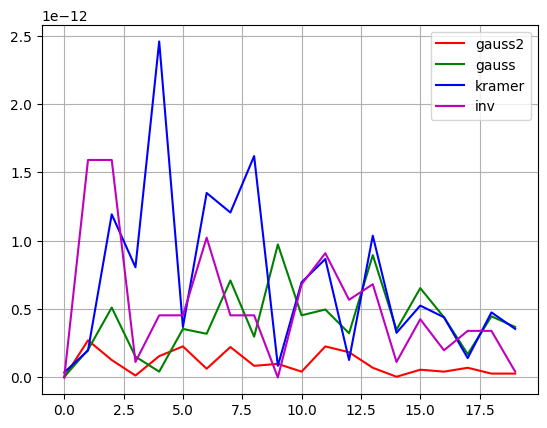

In [276]:
import matplotlib.pyplot as plt
n = 20
err_gauss = [abs(x_gauss[i] - X[i][0]) for i in range(n)]
err_gauss2 = [abs(x_gauss2[i] - X[i][0]) for i in range(n)]
err_kramer = [abs(x_kramer[i] - X[i][0]) for i in range(n)]
err_inv = [abs(x_inv[i] - X[i][0]) for i in range(n)]

plt.plot([i for i in range(n)], err_gauss2, 'r', label='gauss2')
plt.plot([i for i in range(n)], err_gauss, 'g', label='gauss')
plt.plot([i for i in range(n)], err_kramer, 'b', label='kramer')
plt.plot([i for i in range(20)], err_inv, 'm', label='inv')
plt.plot()
plt.grid()
plt.legend()